In [10]:
MODEL_1_WIDTH = 128
MODEL_1_HEIGHT = 128
MODEL_2_WIDTH = 320
MODEL_2_HEIGHT = 240
#DATA_PATH = "D:/dataset/test/data_test.csv"
#MODEL_1_NAME = "model_resnet_custom_dataset_1719522517.keras"
#MODEL_2_NAME = "model_unet_custom_dataset_1719536196.keras"
DATA_PATH = "D:/kitti_dataset/test/data_test.csv"
MODEL_1_NAME = "model_kitti_resnet_1716910504.keras"
MODEL_2_NAME = "model_kitti_unet_1719391955.keras"
SAMPLES_COUNT = 4

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import random

In [12]:
%run utils/datasets.ipynb

In [13]:
img_dm_pairs = read_csv(DATA_PATH)
labels = {i: j for i,j in img_dm_pairs}
test_paths = [i for i, j in img_dm_pairs]
print(len(test_paths))
parent_folder = DATA_PATH.rsplit('/', 1)[0]
partition = {'test': test_paths}

4


In [14]:
x_test_1 = np.empty((len(test_paths), MODEL_1_HEIGHT, MODEL_1_WIDTH, 3))
y_test_1 = np.empty((len(test_paths), MODEL_1_HEIGHT, MODEL_1_WIDTH, 1))

for i, ID in enumerate(partition['test'][:]):
    x_test_1[i, ] = preprocess_image(ID, MODEL_1_HEIGHT, MODEL_1_WIDTH, depth=False, horizontal_flip=False)
    y_test_1[i, ] = preprocess_image(ID, MODEL_1_HEIGHT, MODEL_1_WIDTH, depth=True, horizontal_flip=False)

In [15]:
x_test_2 = np.empty((len(test_paths), MODEL_2_HEIGHT, MODEL_2_WIDTH, 3))
y_test_2 = np.empty((len(test_paths), MODEL_2_HEIGHT, MODEL_2_WIDTH, 1))

for i, ID in enumerate(partition['test'][:]):
    x_test_2[i, ] = preprocess_image(ID, MODEL_2_HEIGHT, MODEL_2_WIDTH, depth=False, horizontal_flip=False)
    y_test_2[i, ] = preprocess_image(ID, MODEL_2_HEIGHT, MODEL_2_WIDTH, depth=True, horizontal_flip=False)

In [16]:
model_1 = tf.keras.models.load_model(MODEL_1_NAME, compile=False) # only for prediction

In [17]:
model_2 = tf.keras.models.load_model(MODEL_2_NAME, compile=False) # only for prediction

2/2 [==============================] - 0s 158ms/step


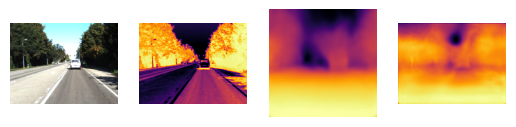

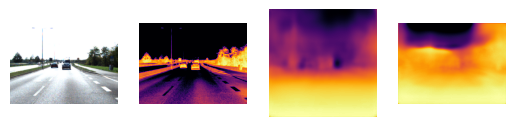

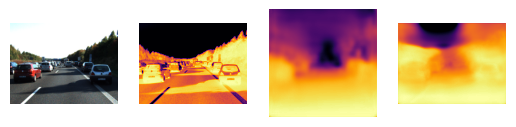

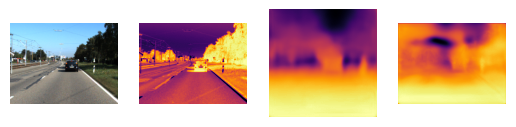

In [18]:
ixs = list(range(len(x_test_1)))
random.shuffle(ixs)
ixs = ixs[:SAMPLES_COUNT]
preds_1 = model_1.predict(x_test_1[ixs], batch_size=2)
preds_2 = model_2.predict(x_test_2[ixs], batch_size=2)
for i in range(SAMPLES_COUNT):
    path = partition['test'][ixs[i]]
    label_path = path
    pred_1 = preds_1[i]
    pred_2 = preds_2[i]
    
    plt.subplot(1, 4, 1)
    plt.axis("off")
    img1 = preprocess_image(path, MODEL_2_HEIGHT, MODEL_2_WIDTH, depth=False, horizontal_flip=False)
    img1 = cv2.cvtColor((img1 * 255.0).astype(np.uint8), cv2.COLOR_BGR2RGB)
    plt.imshow(img1)

    plt.subplot(1, 4, 2)
    plt.axis("off")
    img = preprocess_image(label_path, MODEL_2_HEIGHT, MODEL_2_WIDTH, depth=True, horizontal_flip=False)
    plt.imshow(img, cmap=plt.get_cmap('inferno_r'))

    plt.subplot(1, 4, 3)
    plt.axis("off")
    plt.imshow(pred_1, cmap=plt.get_cmap('inferno_r'))

    plt.subplot(1, 4, 4)
    plt.axis("off")
    plt.imshow(pred_2, cmap=plt.get_cmap('inferno_r'))

    plt.show()

In [ ]:
## Test

2/2 [==============================] - 0s 150ms/step


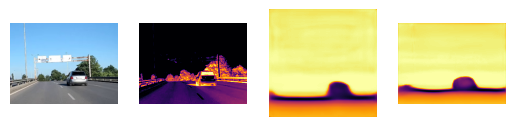

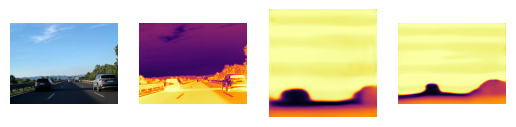

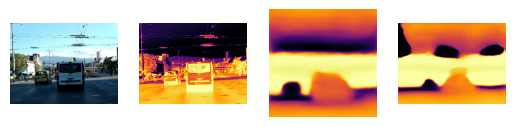

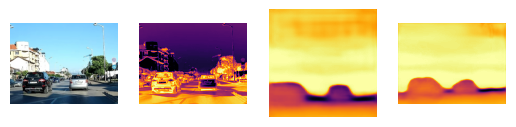

In [23]:
DATA_PATH = "D:/dataset/test/data_test.csv"
MODEL_1_NAME = "model_resnet_custom_dataset_1719522517.keras"
MODEL_2_NAME = "model_unet_custom_dataset_1719536196.keras"
# DATA_PATH = "D:/dataset/test/data_test.csv"
# MODEL_1_NAME = "model_kitti_resnet_1716910504.keras"
# MODEL_2_NAME = "model_kitti_unet_1719391955.keras"

model_1 = tf.keras.models.load_model(MODEL_1_NAME, compile=False)
model_2 = tf.keras.models.load_model(MODEL_2_NAME, compile=False)

img_dm_pairs = read_csv(DATA_PATH)
test_paths = [i for i, j in img_dm_pairs]
labels = {i: j for i, j in img_dm_pairs}
partition = {'test': test_paths}

MODEL_1_HEIGHT, MODEL_1_WIDTH = 128, 128
MODEL_2_HEIGHT, MODEL_2_WIDTH = 240, 320

SAMPLES_COUNT = 4
ixs = list(range(len(test_paths)))
random.shuffle(ixs)
ixs = ixs[:SAMPLES_COUNT]

x_test_1 = np.empty((SAMPLES_COUNT, MODEL_1_HEIGHT, MODEL_1_WIDTH, 3))
x_test_2 = np.empty((SAMPLES_COUNT, MODEL_2_HEIGHT, MODEL_2_WIDTH, 3))

for i, ID in enumerate(ixs):
    x_test_1[i, ] = preprocess_image(test_paths[ID], MODEL_1_HEIGHT, MODEL_1_WIDTH, depth=False, horizontal_flip=False)
    x_test_2[i, ] = preprocess_image(test_paths[ID], MODEL_2_HEIGHT, MODEL_2_WIDTH, depth=False, horizontal_flip=False)

preds_1 = model_1.predict(x_test_1, batch_size=2)
preds_2 = model_2.predict(x_test_2, batch_size=2)

def normalize_image(image, min_val, max_val):
    norm_image = (image - min_val) / (max_val - min_val)
    norm_image = np.clip(norm_image, 0, 1)
    return norm_image

def min_max_pix(image):
    mind = np.inf
    maxd = -np.inf

    mind = min(mind, np.min(image))
    maxd = max(maxd, np.max(image))
    return mind, maxd

#min_val = 0
#max_val = 101  #

for i in range(SAMPLES_COUNT):
    path = partition['test'][ixs[i]]
    label_path = path
    pred_1 = preds_1[i]
    pred_2 = preds_2[i]

    plt.subplot(1, 4, 1)
    plt.axis("off")
    img1 = preprocess_image(path, MODEL_2_HEIGHT, MODEL_2_WIDTH, depth=False, horizontal_flip=False)
    img1 = cv2.cvtColor((img1 * 255.0).astype(np.uint8), cv2.COLOR_BGR2RGB)
    plt.imshow(img1)

    plt.subplot(1, 4, 2)
    plt.axis("off")
    img = preprocess_image(label_path, MODEL_2_HEIGHT, MODEL_2_WIDTH, depth=True, horizontal_flip=False)
    img = normalize_image(img, min_val, max_val)
    plt.imshow(img, cmap=plt.get_cmap('inferno_r'))

    plt.subplot(1, 4, 3)
    plt.axis("off")
    min_val, max_val = min_max_pix(pred_1)
    pred_1 = normalize_image(pred_1, min_val, max_val)
    plt.imshow(pred_1, cmap=plt.get_cmap('inferno_r'))

    plt.subplot(1, 4, 4)
    plt.axis("off")
    min_val, max_val = min_max_pix(pred_2)
    pred_2 = normalize_image(pred_2, min_val, max_val)
    plt.imshow(pred_2, cmap=plt.get_cmap('inferno_r'))

    plt.show()
